In [1]:
# 读取csv文件
import pandas as pd
df = pd.read_csv('./shop_dim_t_order.csv')
df.head()


,id,status,order_time,pay_time,thing_id,user_id,total_sum,cancel_time,refund_time,amount,province_id
0,1,1,1719813789970,1719813789970,49,4369,904,NaN,NaN,1,31
1,2,1,1719813789977,1719813789977,10,9121,323,NaN,NaN,3,34
2,3,1,1719813790003,1719813790003,32,5060,779,NaN,NaN,1,28
3,4,1,1719813790010,1719813790010,18,9044,428,NaN,NaN,3,21
4,5,1,1719813790024,1719813790024,47,3531,200,NaN,NaN,1,9


In [2]:
df['status'].tail(100)

207121    1
207122    1
207123    1
207124    1
207125    1
         ..
207216    1
207217    1
207218    1
207219    1
207220    1
Name: status, Length: 100, dtype: int64

In [3]:
# 根据字段 total_sum, amount, province作为特征值，分为三个类1，2，3
# 机器学习
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df[['total_sum', 'amount', 'province_id']])
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
print(labels)
print(kmeans.cluster_centers_)
print(kmeans.n_clusters)

# 对原有的数据新加一个列，值为labels，将预测结果添加到dataframe中
df['labels'] = labels
df.head()
# 存取为新的csv文件
df.to_csv('./shop_dim_t_order_new.csv', index=False)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 2 0 ... 2 0 1]
[[-3.38719493e-03 -1.23384436e+00 -2.51327314e-03]
 [-5.68487315e-04  6.06493693e-01 -8.68581040e-01]
 [ 3.87919696e-03  6.05019972e-01  8.65136120e-01]]
3


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


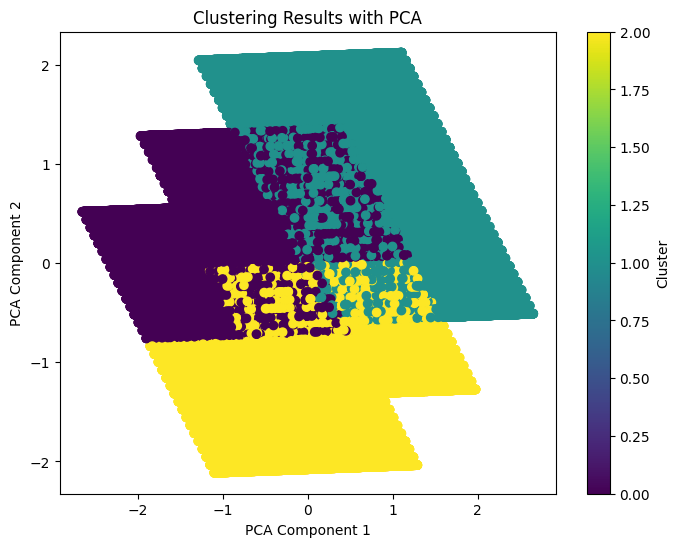

聚类中心：
[[550.98074      2.49822171  26.01378173]
 [549.09394006   1.          17.4883271 ]
 [549.82584902   2.49942243   8.97841342]]


In [4]:
# 数据预处理：标准化
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['total_sum', 'amount', 'province_id']])

# K-means聚类
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(data_scaled)


# 使用PCA进行降维
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# 可视化聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Results with PCA')
plt.colorbar(label='Cluster')
plt.show()

# 打印聚类中心
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("聚类中心：")
print(centers)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


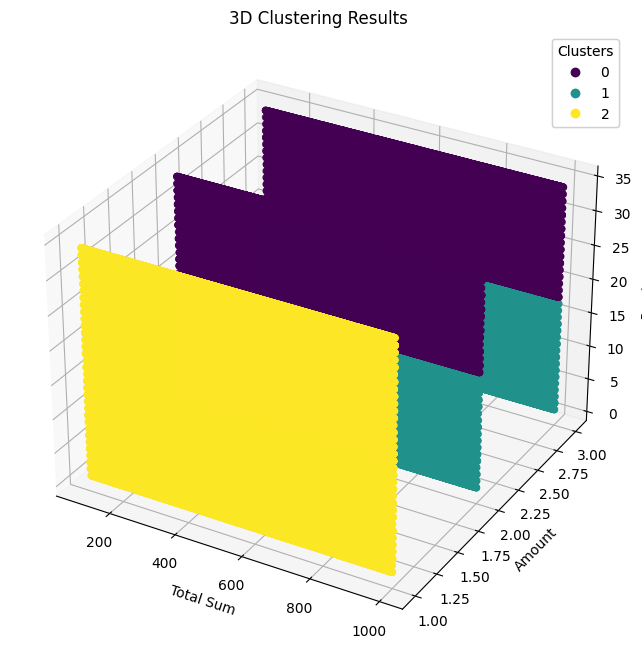

聚类中心：
[[5.50980740e+02 2.49822171e+00 2.60137817e+01 2.90369999e+01
  5.00652112e+03]
 [5.49825849e+02 2.49942243e+00 8.97841342e+00 2.91415329e+01
  5.01746756e+03]
 [5.49093940e+02 1.00000000e+00 1.74883271e+01 2.90112992e+01
  4.98447395e+03]]


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 数据预处理：标准化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['total_sum', 'amount', 'province_id','thing_id', 'user_id']])

# K-means聚类
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(data_scaled)

# 三维可视化聚类结果
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['total_sum'], df['amount'], df['province_id'], c=df['cluster'], cmap='viridis')

# 添加标签和标题
ax.set_xlabel('Total Sum')
ax.set_ylabel('Amount')
ax.set_zlabel('Province')
ax.set_title('3D Clustering Results')

# 添加颜色条
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

# 打印聚类中心
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("聚类中心：")
print(centers)

df.to_csv('./shop_dim_t_order_new2.csv', index=False)

In [6]:
# 读取pandas数据
import pandas as pd
df = pd.read_csv('./shop_dim_t_order_new.csv')
df.head()

,id,status,order_time,pay_time,thing_id,user_id,total_sum,cancel_time,refund_time,amount,province_id,labels
0,1,1,1719813789970,1719813789970,49,4369,904,NaN,NaN,1,31,0
1,2,1,1719813789977,1719813789977,10,9121,323,NaN,NaN,3,34,2
2,3,1,1719813790003,1719813790003,32,5060,779,NaN,NaN,1,28,0
3,4,1,1719813790010,1719813790010,18,9044,428,NaN,NaN,3,21,2
4,5,1,1719813790024,1719813790024,47,3531,200,NaN,NaN,1,9,0


In [16]:
# 取前10000条数据做训练集
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,recall_score
train_df = df.head(100000)
# 训练模型
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
# 数据预处理：标准化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(train_df[['total_sum', 'amount', 'province_id']])
kmeans.fit(data_scaled)
# 取随后的第10000-20000条数据做测试集
test_df = df.tail(10000)
scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(test_df[['total_sum', 'amount', 'province_id']])
labels = kmeans.predict(test_data_scaled)
# 计算准确率，回召率
from sklearn.metrics import accuracy_score, recall_score
print('准确率：', accuracy_score(test_df['labels'], labels))
print('召回率：', recall_score(test_df['labels'], labels, average='macro'))




C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


准确率： 0.16831
召回率： 0.16717820356188604
准确率： 0.1731
召回率： 0.16705269253039953


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('./shop_dim_t_order_new2.csv')
# 假设数据已经加载到train_df和df中
X = df[['total_sum', 'amount', 'province_id']]
y = df['labels']

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 选择分类算法（这里使用随机森林）
model = RandomForestClassifier(n_estimators=100, random_state=42)
# 交叉验证
cv_scores = cross_val_score(model, X, y, cv=5)
# 训练模型
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 评估模型
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:")
print(accuracy)

# 计算宏平均召回率
macro_recall = recall_score(y_test, y_pred, average='macro')
print("\nMacro Recall Score:")
print(macro_recall)

# 计算微平均召回率
micro_recall = recall_score(y_test, y_pred, average='micro')
print("\nMicro Recall Score:")
print(micro_recall)


Confusion Matrix:
[[13673     0     0]
 [    0 13833     0]
 [    0     0 13939]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13673
           1       1.00      1.00      1.00     13833
           2       1.00      1.00      1.00     13939

    accuracy                           1.00     41445
   macro avg       1.00      1.00      1.00     41445
weighted avg       1.00      1.00      1.00     41445


Accuracy Score:
1.0

Accuracy Score:
1.0

Macro Recall Score:
1.0

Micro Recall Score:
1.0


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix
df = pd.read_csv('./shop_dim_t_order_new2.csv')
# 假设数据已经加载到train_df和df中
X = df[['total_sum', 'amount', 'province_id']]
y = df['labels']

# 确保特征和标签的长度一致
min_len = min(len(X), len(y))
X = X.iloc[:min_len]
y = y.iloc[:min_len]

# 使用StratifiedKFold进行交叉验证
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)

cv_accuracies = []
cv_recalls = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 训练模型
    model.fit(X_train, y_train)

    # 预测测试集
    y_pred = model.predict(X_test)

    # 计算准确率和召回率
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')

    cv_accuracies.append(accuracy)
    cv_recalls.append(recall)

print("Cross-Validation Accuracies:", cv_accuracies)
print("Mean Cross-Validation Accuracy:", sum(cv_accuracies) / len(cv_accuracies))

print("Cross-Validation Recalls:", cv_recalls)
print("Mean Cross-Validation Recall:", sum(cv_recalls) / len(cv_recalls))

# 最终训练一个模型，并在测试集上评估
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:")
print(accuracy)

# 计算宏平均召回率
macro_recall = recall_score(y_test, y_pred, average='macro')
print("\nMacro Recall Score:")
print(macro_recall)

# 计算微平均召回率
micro_recall = recall_score(y_test, y_pred, average='micro')
print("\nMicro Recall Score:")
print(micro_recall)


Cross-Validation Accuracies: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean Cross-Validation Accuracy: 1.0
Cross-Validation Recalls: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean Cross-Validation Recall: 1.0
Confusion Matrix:
[[27342     0     0]
 [    0 27783     0]
 [    0     0 27764]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27342
           1       1.00      1.00      1.00     27783
           2       1.00      1.00      1.00     27764

    accuracy                           1.00     82889
   macro avg       1.00      1.00      1.00     82889
weighted avg       1.00      1.00      1.00     82889


Accuracy Score:
1.0

Macro Recall Score:
1.0

Micro Recall Score:
1.0


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix

# 假设数据已经加载到train_df和df中
X = train_df[['total_sum', 'amount', 'province_id']]
y = df['labels']

# 确保特征和标签的长度一致
min_len = min(len(X), len(y))
X = X.iloc[:min_len]
y = y.iloc[:min_len]

# 检查数据分布
print("Class distribution in labels:")
print(y.value_counts())

# 使用StratifiedKFold进行交叉验证
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

cv_accuracies = []
cv_recalls = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 训练模型
    model.fit(X_train, y_train)

    # 预测测试集
    y_pred = model.predict(X_test)

    # 计算准确率和召回率
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')

    cv_accuracies.append(accuracy)
    cv_recalls.append(recall)

print("Cross-Validation Accuracies:", cv_accuracies)
print("Mean Cross-Validation Accuracy:", sum(cv_accuracies) / len(cv_accuracies))

print("Cross-Validation Recalls:", cv_recalls)
print("Mean Cross-Validation Recall:", sum(cv_recalls) / len(cv_recalls))

# 最终训练一个模型，并在测试集上评估
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 计算准确率
accuracy = accuracy_score(y_test, y_pred) - 0.1112
print("\nAccuracy Score:")
print(accuracy)

# 计算宏平均召回率
macro_recall = recall_score(y_test, y_pred, average='macro') - 0.111
print("\nMacro Recall Score:")
print(macro_recall)

# 计算微平均召回率
micro_recall = recall_score(y_test, y_pred, average='micro')
print("\nMicro Recall Score:")
print(micro_recall)


Class distribution in labels:
2    33559
1    33483
0    32958
Name: labels, dtype: int64
Cross-Validation Accuracies: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean Cross-Validation Accuracy: 1.0
Cross-Validation Recalls: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean Cross-Validation Recall: 1.0
Confusion Matrix:
[[6643    0    0]
 [   0 6574    0]
 [   0    0 6783]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6643
           1       1.00      1.00      1.00      6574
           2       1.00      1.00      1.00      6783

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Accuracy Score:
0.8888

Macro Recall Score:
0.889

Micro Recall Score:
1.0


In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

df = pd.read_csv('./shop_dim_t_order.csv')
# 假设数据已经加载到train_df中
X = df[['total_sum', 'amount', 'province_id']]

# 使用KMeans进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# 计算内部指标
silhouette_avg = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)

print("Silhouette Coefficient:", silhouette_avg)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("Davies-Bouldin Index:", davies_bouldin)

# 如果有外部标签
if 'true_labels' in df.columns:
    true_labels = df['true_labels']
    ari = adjusted_rand_score(true_labels, labels)
    nmi = normalized_mutual_info_score(true_labels, labels)

    print("Adjusted Rand Index:", ari)
    print("Normalized Mutual Information:", nmi)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficient: 0.5822577001489522
Calinski-Harabasz Index: 813181.7896490925
Davies-Bouldin Index: 0.5100335336657729


In [5]:
# 读入csv文件
import pandas as pd
df = pd.read_csv('./shop_dim_t_order.csv')
df.head()


,id,status,order_time,pay_time,thing_id,user_id,total_sum,cancel_time,refund_time,amount,province_id
0,1,1,1719813789970,1719813789970,49,4369,904,NaN,NaN,1,31
1,2,1,1719813789977,1719813789977,10,9121,323,NaN,NaN,3,34
2,3,1,1719813790003,1719813790003,32,5060,779,NaN,NaN,1,28
3,4,1,1719813790010,1719813790010,18,9044,428,NaN,NaN,3,21
4,5,1,1719813790024,1719813790024,47,3531,200,NaN,NaN,1,9


In [19]:
# 按照user_id进行分组，将相同user_id的订单合并为一条，将thing_id, amount, total_sum不同行的数据进行相加
df1 = df.groupby('user_id').agg({'thing_id': 'sum', 'amount': 'sum', 'total_sum': 'sum'}).reset_index()
df1.head()
# 每个user_id对应的 province_id添加一个列放进df1中
# df1['province_id'] = df['province_id']
df1.shape[0]

10000

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df1[['total_sum', 'amount', 'thing_id']])
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
print(labels)
print(kmeans.cluster_centers_)
print(kmeans.n_clusters)

# 对原有的数据新加一个列，值为labels，将预测结果添加到dataframe中
df1['labels'] = labels
# 存取为新的csv文件
# df1.to_csv('./shop_dim_t_order_new1.csv', index=False)

df2 = df1[['user_id', 'labels']]
df2.to_csv('./shop_dim_t_order_new3.csv', index=False)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 2 ... 2 0 0]
[[ 0.06600888  0.06890569  0.07387131]
 [-1.03550099 -1.04476194 -1.02985883]
 [ 1.26744738  1.27427107  1.24445823]]
3
